In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data
df = pd.read_csv('../../data/Sleeper_data_all_players_season_2023.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())


  player_id     player_name   age position  depth_chart_order  week team  \
0     11533  Brandon Aubrey  29.0        K                1.0     1  DAL   
1     11533  Brandon Aubrey  29.0        K                1.0    10  DAL   
2     11533  Brandon Aubrey  29.0        K                1.0    11  DAL   
3     11533  Brandon Aubrey  29.0        K                1.0    12  DAL   
4     11533  Brandon Aubrey  29.0        K                1.0    13  DAL   

  opponent        date  projected_points_half_ppr  ...  projected_rush_yards  \
0      NYG  2023-09-10                       7.24  ...                   NaN   
1      NYG  2023-11-12                       9.08  ...                   NaN   
2      CAR  2023-11-19                       8.98  ...                   NaN   
3      WAS  2023-11-23                       9.16  ...                   NaN   
4      SEA  2023-11-30                       8.87  ...                   NaN   

   actual_rush_yards  projected_rush_attempts  actual_rush_att

In [3]:

# Check for missing values
print(df.isnull().sum())

# Display summary statistics
print(df.describe())

player_id                        0
player_name                    544
age                            544
position                         0
depth_chart_order             2584
week                             0
team                             0
opponent                         0
date                             0
projected_points_half_ppr     3411
actual_points_half_ppr           0
projected_pass_yards          9242
actual_pass_yards                0
projected_pass_tds            9243
actual_pass_tds                  0
projected_pass_attempts       9242
actual_pass_attempts             0
projected_pass_completions    9242
actual_pass_completions          0
projected_rush_yards          6367
actual_rush_yards                0
projected_rush_attempts       6379
actual_rush_attempts             0
projected_rush_tds            7786
actual_rush_tds                  0
actual_interceptions             0
actual_sacks                     0
actual_fumbles                   0
actual_fumbles_lost 

In [5]:
# Convert 'week' to numeric if it's not already
df['week'] = pd.to_numeric(df['week'], errors='coerce')

# Ensure 'projected_points' and 'actual_points' are numeric
df['projected_points'] = pd.to_numeric(df['projected_points_half_ppr'], errors='coerce')
df['actual_points'] = pd.to_numeric(df['actual_points_half_ppr'], errors='coerce')

# Remove rows with missing values in key columns
df = df.dropna(subset=['week', 'projected_points', 'actual_points'])

# If you want to focus on specific positions, you can filter the dataframe
# For example, to focus on QB, RB, WR, TE:
positions_of_interest = ['QB', 'RB', 'WR', 'TE']
df = df[df['position'].isin(positions_of_interest)]

# Sort the dataframe by player_id and week
df = df.sort_values(['player_id', 'week'])

In [6]:
# Calculate overall accuracy metrics
mse = mean_squared_error(df['actual_points'], df['projected_points'])
rmse = mean_squared_error(df['actual_points'], df['projected_points'], squared=False)
mae = mean_absolute_error(df['actual_points'], df['projected_points'])
r2 = r2_score(df['actual_points'], df['projected_points'])

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Calculate accuracy metrics by position
metrics_by_position = df.groupby('position').apply(lambda x: pd.Series({
    'MSE': mean_squared_error(x['actual_points'], x['projected_points']),
    'RMSE': mean_squared_error(x['actual_points'], x['projected_points'], squared=False),
    'MAE': mean_absolute_error(x['actual_points'], x['projected_points']),
    'R2': r2_score(x['actual_points'], x['projected_points'])
}))

print("\nAccuracy Metrics by Position:")
print(metrics_by_position)

Mean Squared Error: 29.50
Root Mean Squared Error: 5.43
Mean Absolute Error: 3.80
R-squared Score: 0.48

Accuracy Metrics by Position:
                MSE      RMSE       MAE        R2
position                                         
QB        56.396181  7.509739  6.050455  0.082762
RB        30.899607  5.558741  3.822723  0.443876
TE        15.528835  3.940664  2.663833  0.348039
WR        29.915850  5.469538  3.881770  0.373543


/Users/brad/python_projects/bkenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/brad/python_projects/bkenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/brad/python_projects/bkenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/brad/python_projects/bkenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.

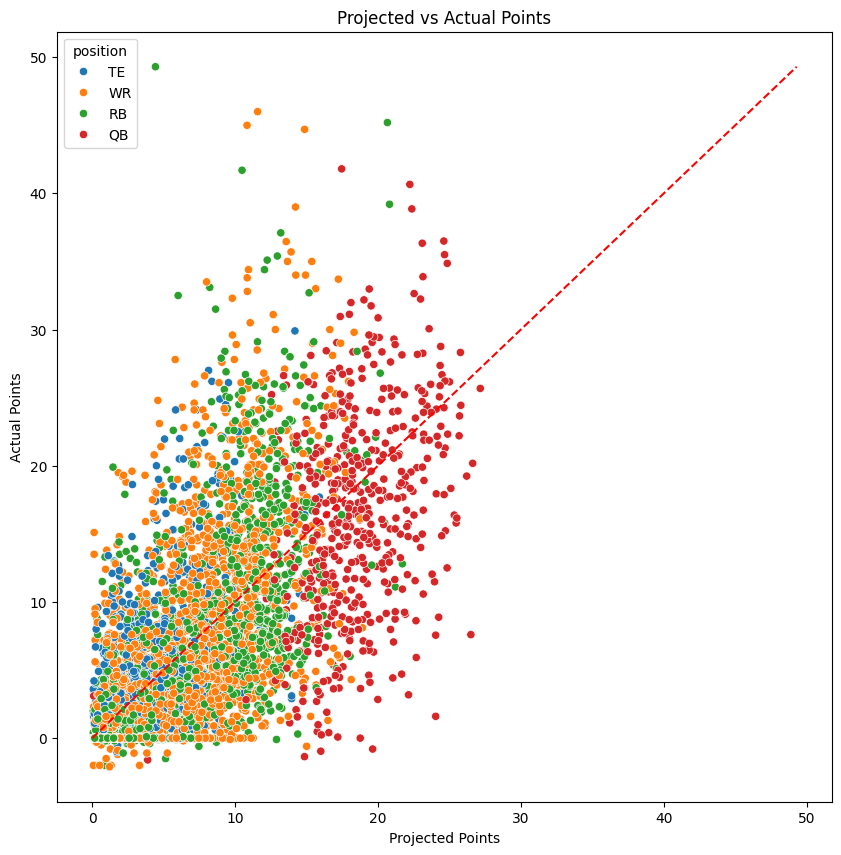

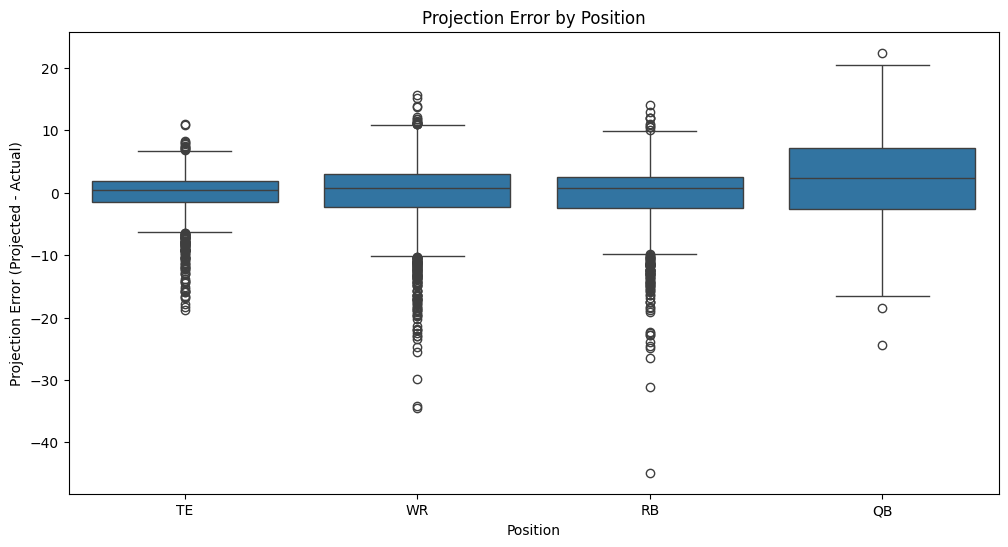

/var/folders/q_/df_6hwqj4clf6j6dfj0hpk0r0000gn/T/ipykernel_1855/246135843.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_accuracy = df.groupby('week').apply(lambda x: 1 - mean_absolute_error(x['actual_points'], x['projected_points']) / x['actual_points'].mean())


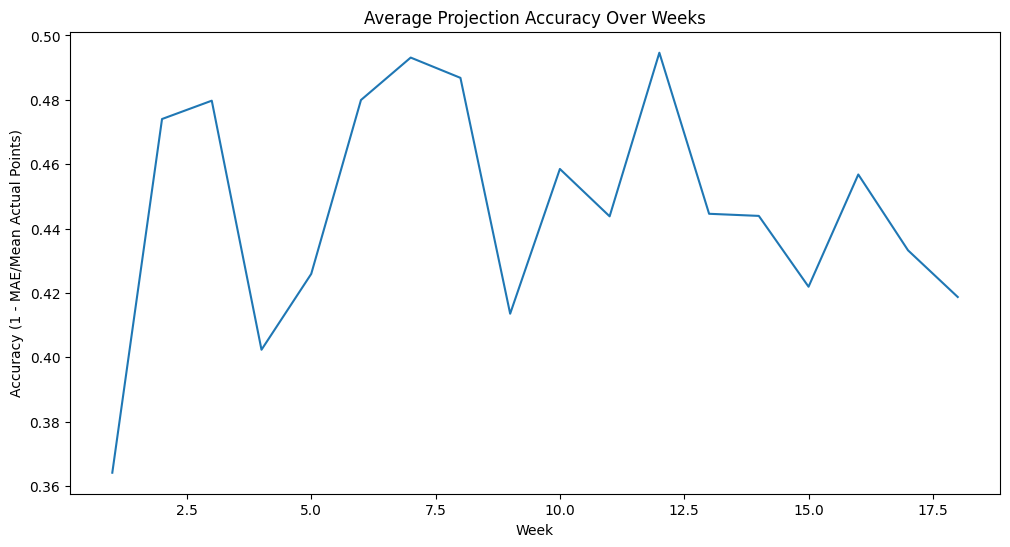

In [7]:
# Scatter plot of projected vs actual points
plt.figure(figsize=(10, 10))
sns.scatterplot(x='projected_points', y='actual_points', hue='position', data=df)
plt.plot([0, df['actual_points'].max()], [0, df['actual_points'].max()], 'r--')
plt.title('Projected vs Actual Points')
plt.xlabel('Projected Points')
plt.ylabel('Actual Points')
plt.show()

# Box plot of projection error by position
df['projection_error'] = df['projected_points'] - df['actual_points']
plt.figure(figsize=(12, 6))
sns.boxplot(x='position', y='projection_error', data=df)
plt.title('Projection Error by Position')
plt.xlabel('Position')
plt.ylabel('Projection Error (Projected - Actual)')
plt.show()

# Line plot of average projection accuracy over weeks
weekly_accuracy = df.groupby('week').apply(lambda x: 1 - mean_absolute_error(x['actual_points'], x['projected_points']) / x['actual_points'].mean())
plt.figure(figsize=(12, 6))
weekly_accuracy.plot()
plt.title('Average Projection Accuracy Over Weeks')
plt.xlabel('Week')
plt.ylabel('Accuracy (1 - MAE/Mean Actual Points)')
plt.show()